# Credit Card Default Dataset in Taiwan

source : https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

 **FEATURES:**
- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes - individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)
- MARRIAGE: Marital status (1 = married; 2 = single; 3 = divorce; 0=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no) [Target]


In [ ]:
pip install scikit-garden

     |████████████████████████████████| 317kB 22.5MB/s 
  Created wheel for scikit-garden: filename=scikit_garden-0.1.3-cp37-cp37m-linux_x86_64.whl size=665056 sha256=9fdd9d8e721d9cb8710f316b436ac278708fded4fa679713d7ef6cab0b669ed0
  Stored in directory: /root/.cache/pip/wheels/d0/ef/71/3a032ba9a2b70690c9f9ec2e383afee6610f509af312ff2cf3
Successfully built scikit-garden


In [ ]:
pip install scikit-optimize

     |████████████████████████████████| 102kB 8.3MB/s 


In [ ]:
import pandas as pd
#df = pd.read_excel('default of credit card clients.xls',header=1)
from google.colab import drive



drive.mount('/content/drive',force_remount=True)
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Datasets/default of credit card clients.xls',header=1)

Mounted at /content/drive


# 1.  Library

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from skopt import BayesSearchCV
from xgboost import XGBClassifier
import xgboost as xbg

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# 2.  Data Modeling

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


- Rename the target ("default payment next month") to a short name: "default"

- To make it easier to understand, it changes: PAY_0,PAY_1,PAY_2,etc, for the months (april to september)

In [ ]:
df= df.rename({'default payment next month':'DEFAULT',
               'PAY_0':'PAY_APR',
               'PAY_2':'PAY_MAY',
               'PAY_3':'PAY_JUN',
               'PAY_4':'PAY_JUL',
               'PAY_5':'PAY_AUG',
               'PAY_6':'PAY_SEP'}, axis=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APR,PAY_MAY,PAY_JUN,PAY_JUL,PAY_AUG,PAY_SEP,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


- Change in nomenclature in the same way as "PAY_X" in order to facilitate understanding

In [ ]:
df= df.rename({
               'BILL_AMT1':'BILL_APR',
               'BILL_AMT2':'BILL_MAY',
               'BILL_AMT3':'BILL_JUN',
               'BILL_AMT4':'BILL_JUL',
               'BILL_AMT5':'BILL_AUG',
               'BILL_AMT6':'BILL_SEP'}, axis=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APR,PAY_MAY,PAY_JUN,PAY_JUL,PAY_AUG,PAY_SEP,BILL_APR,BILL_MAY,BILL_JUN,BILL_JUL,BILL_AUG,BILL_SEP,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df= df.rename({
               'PAY_AMT6':'PAYAMT_APR',
               'PAY_AMT5':'PAYAMT_MAY',
               'PAY_AMT4':'PAYAMT_JUN',
               'PAY_AMT3':'PAYAMT_JUL',
               'PAY_AMT2':'PAYAMT_AUG',
               'PAY_AMT1':'PAYAMT_SEP'
               }, axis=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APR,PAY_MAY,PAY_JUN,PAY_JUL,PAY_AUG,PAY_SEP,BILL_APR,BILL_MAY,BILL_JUN,BILL_JUL,BILL_AUG,BILL_SEP,PAYAMT_SEP,PAYAMT_AUG,PAYAMT_JUL,PAYAMT_JUN,PAYAMT_MAY,PAYAMT_APR,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
print(df['SEX'].value_counts())
print('\n')
print(df['EDUCATION'].value_counts())
print('\n')
print(df['MARRIAGE'].value_counts())
print('\n Age unique')


2    18112
1    11888
Name: SEX, dtype: int64


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

 Age unique


Query the "AGE" values to see if there are any invalid age values

In [ ]:
print(df['AGE'].unique())
print('\n')

[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]




Changing 1 to 0; 2 to 1; 3 to 2 and put 0 for "others" and replace to 3.

In [ ]:
df['EDUCATION'] = df['EDUCATION'].replace({1:0,2:1,3:2,0:3})

In [ ]:
df['EDUCATION'].value_counts()

1    14030
0    10585
2     4917
5      280
4      123
6       51
3       14
Name: EDUCATION, dtype: int64

Transforming numeric data into categorical data to avoid misleading predictions

In [ ]:
df['MARRIAGE'] = df['MARRIAGE'].replace({1:'M',2:'S',3:'D',0:'NA'})

In [ ]:
df['MARRIAGE'].value_counts()

S     15964
M     13659
D       323
NA       54
Name: MARRIAGE, dtype: int64

Transform 'SEX' into binaries

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
df['SEX'] = df['SEX'].replace({1:0,2:1})

In [ ]:
# 0 = male
# 1 = female
df['SEX'].value_counts()

1    18112
0    11888
Name: SEX, dtype: int64

Check if have null ("NaN") values

In [ ]:
df.isna().sum()

ID            0
LIMIT_BAL     0
SEX           0
EDUCATION     0
MARRIAGE      0
AGE           0
PAY_APR       0
PAY_MAY       0
PAY_JUN       0
PAY_JUL       0
PAY_AUG       0
PAY_SEP       0
BILL_APR      0
BILL_MAY      0
BILL_JUN      0
BILL_JUL      0
BILL_AUG      0
BILL_SEP      0
PAYAMT_SEP    0
PAYAMT_AUG    0
PAYAMT_JUL    0
PAYAMT_JUN    0
PAYAMT_MAY    0
PAYAMT_APR    0
DEFAULT       0
dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APR,PAY_MAY,PAY_JUN,PAY_JUL,PAY_AUG,PAY_SEP,BILL_APR,BILL_MAY,BILL_JUN,BILL_JUL,BILL_AUG,BILL_SEP,PAYAMT_SEP,PAYAMT_AUG,PAYAMT_JUL,PAYAMT_JUN,PAYAMT_MAY,PAYAMT_APR,DEFAULT
0,1,20000,1,1,M,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,1,1,S,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,1,1,S,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,1,1,M,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,0,1,M,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          30000 non-null  int64 
 1   LIMIT_BAL   30000 non-null  int64 
 2   SEX         30000 non-null  int64 
 3   EDUCATION   30000 non-null  int64 
 4   MARRIAGE    30000 non-null  object
 5   AGE         30000 non-null  int64 
 6   PAY_APR     30000 non-null  int64 
 7   PAY_MAY     30000 non-null  int64 
 8   PAY_JUN     30000 non-null  int64 
 9   PAY_JUL     30000 non-null  int64 
 10  PAY_AUG     30000 non-null  int64 
 11  PAY_SEP     30000 non-null  int64 
 12  BILL_APR    30000 non-null  int64 
 13  BILL_MAY    30000 non-null  int64 
 14  BILL_JUN    30000 non-null  int64 
 15  BILL_JUL    30000 non-null  int64 
 16  BILL_AUG    30000 non-null  int64 
 17  BILL_SEP    30000 non-null  int64 
 18  PAYAMT_SEP  30000 non-null  int64 
 19  PAYAMT_AUG  30000 non-null  int64 
 20  PAYAMT

# 3. Data Analysis

The most influential features are whether the person has paid or not (PAY_APR, PAY_MAY, etc).If the person already comes from a history of delay payment for the first few months, the chance of default is greater.

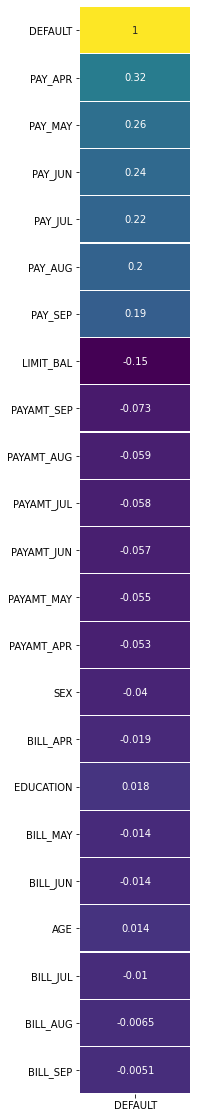

In [ ]:
coef = df1.drop('ID',axis=1).corr()

f1, ax1 = plt.subplots(figsize=(2,20))

coef_default = coef.iloc[:,-1]

coef_features = list(abs(coef.iloc[:,-1]).sort_values(ascending=False).index)

coef_default= pd.DataFrame(coef_default[coef_features])

sns.heatmap(coef_default,annot=True,cmap='viridis', linewidths=0.15,cbar=False)

In [ ]:
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APR,PAY_MAY,PAY_JUN,PAY_JUL,PAY_AUG,PAY_SEP,BILL_APR,BILL_MAY,BILL_JUN,BILL_JUL,BILL_AUG,BILL_SEP,PAYAMT_SEP,PAYAMT_AUG,PAYAMT_JUL,PAYAMT_JUN,PAYAMT_MAY,PAYAMT_APR,DEFAULT
0,1,20000,1,1,M,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,1,1,S,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,1,1,S,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,1,1,M,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,0,1,M,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In this graph can see a value well above the average for "LIMIT_BAL" in "SEX" = 1 (female). This value can distort the prediction and, therefore, will be removed.

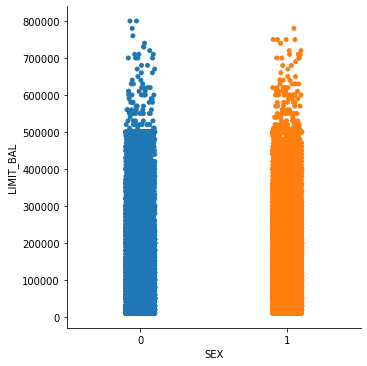

In [ ]:
sns.catplot(x='SEX',y = 'LIMIT_BAL',data=df1)

In [ ]:
#Maximum of 100000 - outlier
df1[df1['SEX']==1]['LIMIT_BAL'].max()

1000000

In [ ]:
df1 = df1.drop(labels=df1[df1['LIMIT_BAL']==1000000].index)

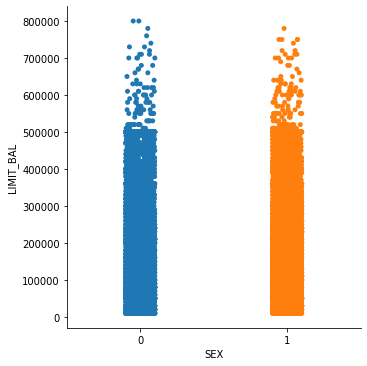

In [ ]:
sns.catplot(x='SEX',y = 'LIMIT_BAL',data=df1)

The limit given to women is slightly higher than that of men

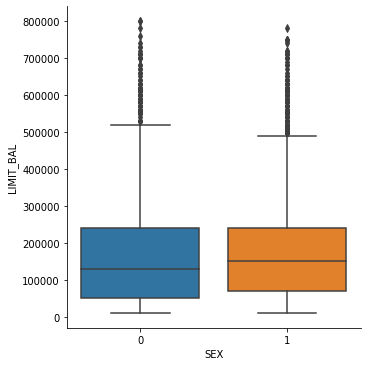

In [ ]:
sns.catplot(x='SEX',y = 'LIMIT_BAL',data=df1, kind='box')

As see in this graph, people with a lower limit are more likely not to pay

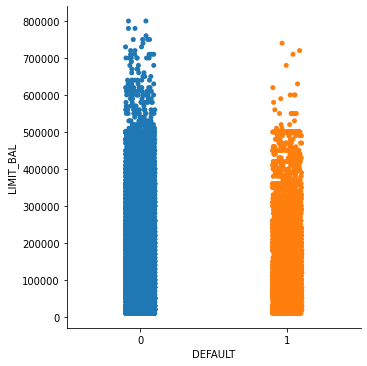

In [ ]:
sns.catplot(y='LIMIT_BAL',x='DEFAULT',data=df1)

When the limit is lower, default is higher. That is, the person has less money or is already due to other defaults, therefore, they have a lower limit.

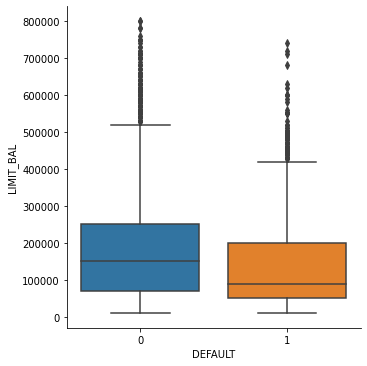

In [ ]:
sns.catplot(y='LIMIT_BAL',x='DEFAULT',kind='box',data=df1)

Data is unbalanced 78% default = 0 and 22% default = 1 . It will be necessary to balance them in order to avoid erroneous predictions.

In [ ]:
df.DEFAULT.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64

In [ ]:
df.DEFAULT.value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

- Tranforming the categorical values into binary with the function get_dummies of pandas

In [ ]:
df_enc = pd.get_dummies(df1,columns=['EDUCATION','MARRIAGE','PAY_APR','PAY_MAY','PAY_JUN','PAY_JUL','PAY_AUG','PAY_SEP'])
df_enc = df_enc.drop('DEFAULT',axis=1)
df_enc.head()
df_enc.shape

(29999, 91)

In [ ]:
df_enc.head(10)

,ID,LIMIT_BAL,SEX,AGE,BILL_APR,BILL_MAY,BILL_JUN,BILL_JUL,BILL_AUG,BILL_SEP,PAYAMT_SEP,PAYAMT_AUG,PAYAMT_JUL,PAYAMT_JUN,PAYAMT_MAY,PAYAMT_APR,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_D,MARRIAGE_M,MARRIAGE_NA,MARRIAGE_S,PAY_APR_-2,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,PAY_MAY_-2,PAY_MAY_-1,...,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_JUL_-2,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_AUG_-2,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_SEP_-2,PAY_SEP_-1,PAY_SEP_0,PAY_SEP_2,PAY_SEP_3,PAY_SEP_4,PAY_SEP_5,PAY_SEP_6,PAY_SEP_7,PAY_SEP_8
0,1,20000,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,120000,1,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,90000,1,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,50000,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,50000,0,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,6,50000,0,37,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,7,500000,0,29,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,8,100000,1,23,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,9,140000,1,28,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,10,20000,0,35,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_default = df1.DEFAULT

In [ ]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29999
Data columns (total 91 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           29999 non-null  int64
 1   LIMIT_BAL    29999 non-null  int64
 2   SEX          29999 non-null  int64
 3   AGE          29999 non-null  int64
 4   BILL_APR     29999 non-null  int64
 5   BILL_MAY     29999 non-null  int64
 6   BILL_JUN     29999 non-null  int64
 7   BILL_JUL     29999 non-null  int64
 8   BILL_AUG     29999 non-null  int64
 9   BILL_SEP     29999 non-null  int64
 10  PAYAMT_SEP   29999 non-null  int64
 11  PAYAMT_AUG   29999 non-null  int64
 12  PAYAMT_JUL   29999 non-null  int64
 13  PAYAMT_JUN   29999 non-null  int64
 14  PAYAMT_MAY   29999 non-null  int64
 15  PAYAMT_APR   29999 non-null  int64
 16  EDUCATION_0  29999 non-null  uint8
 17  EDUCATION_1  29999 non-null  uint8
 18  EDUCATION_2  29999 non-null  uint8
 19  EDUCATION_3  29999 non-null  uint8
 20  EDUCAT

In [ ]:
features = list(df_enc.columns)[1:]

In [ ]:
df1['DEFAULT'].value_counts()

0    23363
1     6636
Name: DEFAULT, dtype: int64

As stated above, the data is unbalanced. Therefore, the "undersampler" technique will be used.

1    5000
0    5000
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


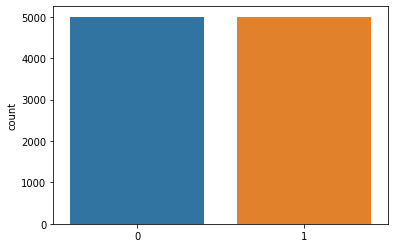

In [ ]:
y = df_default
X = df_enc[features]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.25)


X_train, y_train = RandomUnderSampler().fit_sample(X_train, y_train)
print(pd.Series(y_train).value_counts())
sns.countplot(y_train)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
X_train.shape

(10000, 90)

# 4. Machine Learning:
The following estimators were tested, among which XGBClassifier had the best result.

- RandomForestClassifier;
- DecisionTreeClassifier;
- XGBClassifier;
- SGDClassifier;
- LogisticRegression;
- RidgeClassifier.


# 4.1. RandomForestClassifier

In [ ]:
rf_cls = RandomForestClassifier(random_state=0)

param_dist = {"n_estimators": [400,450,500,550,600],
              'max_depth': [None,2,4,6],
              "min_samples_leaf": range(2,25,5),
              "min_samples_split": [2,3,4],
              "criterion": ["gini"]}

rf_rs = GridSearchCV(estimator=rf_cls,param_grid=param_dist,scoring='roc_auc', verbose=True, n_jobs=-1).fit(X_train,y_train)

print('Best params achieve a train score of', abs(rf_rs.best_score_),'with the params:')
rf_rs.best_params_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 41.8min


In [ ]:
rf_cls = RandomForestClassifier(random_state=0,
                                min_samples_leaf=12,
                                min_samples_split=2,
                                n_estimators=400).fit(X_train,y_train)

rf_cross = cross_val_score(rf_cls, X_train,y_train, cv=10, scoring='roc_auc')



y_pred_rf = rf_cls.predict(X_test)


print("AUC: {}".format(roc_auc_score(y_test, y_pred_rf)))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))  
print('Cross validation Scores:\n', (rf_cross))
print('Cross validation Scores Mean:\n', (rf_cross.mean()))

AUC: 0.7182505995723774
[[4402 1462]
 [ 514 1122]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      5864
           1       0.43      0.69      0.53      1636

    accuracy                           0.74      7500
   macro avg       0.66      0.72      0.67      7500
weighted avg       0.79      0.74      0.75      7500

Cross validation Scores:
 [0.794908 0.782252 0.78224  0.771304 0.765896 0.762072 0.758076 0.761124
 0.80434  0.780884]
Cross validation Scores Mean:
 0.7763096


Choosing features with importance greater than zero

In [ ]:
features_importances = pd.DataFrame({'features': features,'importances':rf_cls.feature_importances_}).sort_values(by='importances',ascending = False)
print(display(features_importances[:38]))
features1 = list(features_importances[features_importances['importances']!=0].features)
len(features1)

,features,importances
30,PAY_APR_2,0.116444
41,PAY_MAY_2,0.065057
28,PAY_APR_0,0.057045
0,LIMIT_BAL,0.053327
9,PAYAMT_SEP,0.050694
52,PAY_JUN_2,0.042218
10,PAYAMT_AUG,0.041078
3,BILL_APR,0.039327
11,PAYAMT_JUL,0.038711
4,BILL_MAY,0.036529


None


63

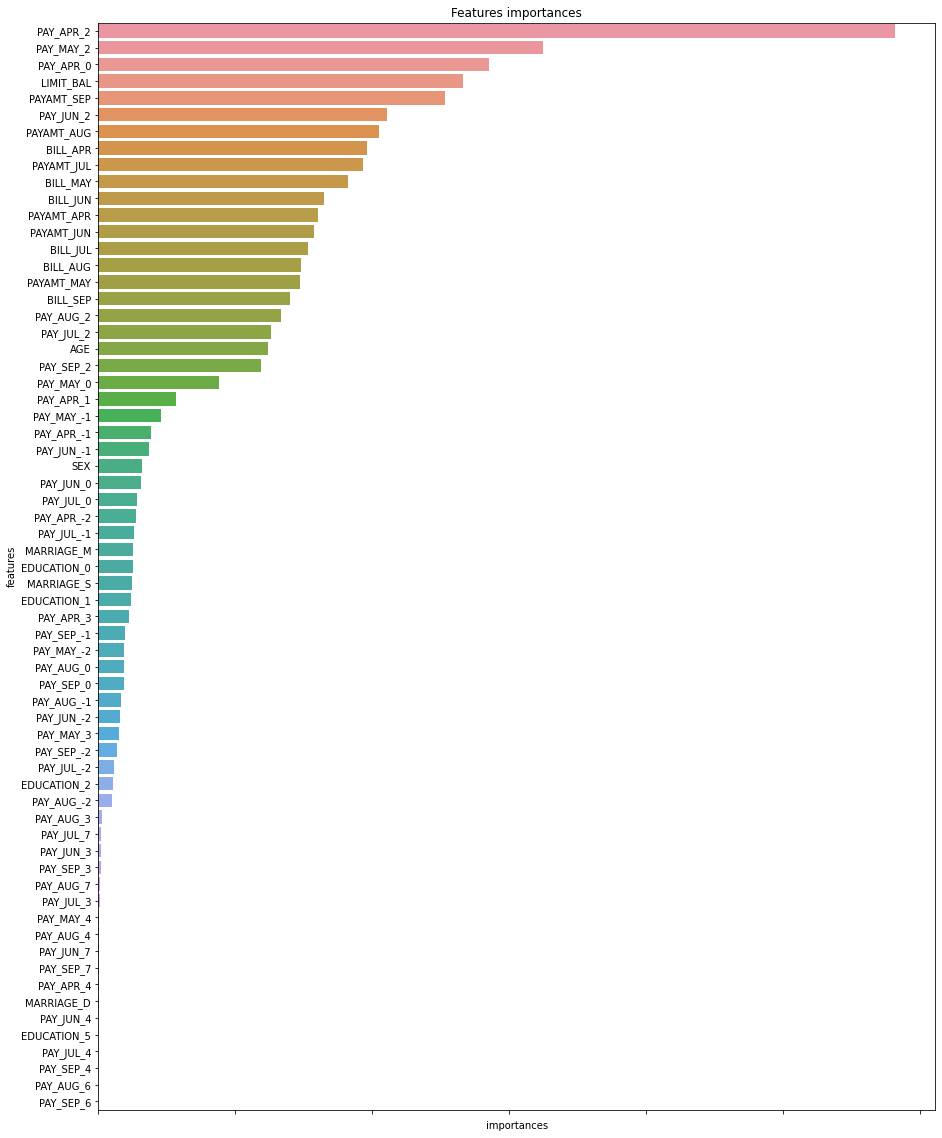

In [ ]:
plt.figure(figsize = (15,20))
plt.title('Features importances')
s = sns.barplot(y='features',x='importances',data=features_importances[:65],orient='h')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

1    5000
0    5000
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


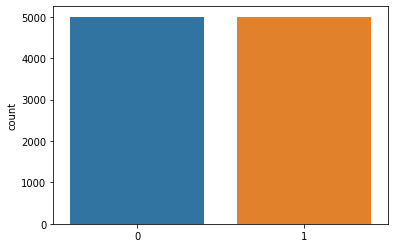

In [ ]:
y = df_default
X = df_enc[features1]


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.25)


X_train, y_train = RandomUnderSampler().fit_sample(X_train, y_train)
print(pd.Series(y_train).value_counts())
sns.countplot(y_train)


X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
X_train.shape

(10000, 63)

In [ ]:
rf_cls = RandomForestClassifier(random_state=0)

param_dist = {"n_estimators": [400,450,500,550,600],
              'max_depth': [None,2,4,6],
              "min_samples_leaf": range(2,25,2),
              "min_samples_split": [2,3,4],
              "criterion": ["gini"]}

rf_rs = GridSearchCV(estimator=rf_cls,param_grid=param_dist,scoring='roc_auc', verbose=True, n_jobs=-1).fit(X_train,y_train)



print('Best params achieve a train score of', abs(rf_rs.best_score_),'with the params:')
rf_rs.best_params_

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 64.7min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 81.4min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 96.5min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 122.0min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 157.0min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 177.2min finished


Best params achieve a train score of 0.7770862 with the params:


In [ ]:
rf_cls = RandomForestClassifier(random_state=0,min_samples_leaf=12,min_samples_split=2,n_estimators=504).fit(X_train,y_train)#,class_weight="balanced",

rf_cross = cross_val_score(rf_cls, X_train,y_train, cv=10, scoring='roc_auc')


y_pred_rf = rf_cls.predict(X_test)


print("AUC: {}".format(roc_auc_score(y_test, y_pred_rf)))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))  
print('Cross validation Scores:\n', (rf_cross))
print('Cross validation Scores Mean:\n', (rf_cross.mean()))

# 4.1. DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=0)

param_dist = {
              'max_depth': [6,7,8],
              "min_samples_leaf": [41,42],
              "min_samples_split": [2,3], #0.5
              "criterion": ["gini"],
              "max_features":[None]}

dt_rs = GridSearchCV(dt,param_dist,scoring='roc_auc', verbose=1,n_jobs=-1).fit(X_train,y_train)

print('Best params achieve a train score of', abs(dt_rs.best_score_),'with the params:')
dt_rs.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.2s finished


Best params achieve a train score of 0.7613551 with the params:


{'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 41,
 'min_samples_split': 2}

In [ ]:
dt = DecisionTreeClassifier(random_state=0,
                            max_depth=6,
                            min_samples_leaf=41,
                            min_samples_split=2)

In [ ]:
param_dist = {'n_estimators': range(100,600,100), 
              'learning_rate': [0.1,0.01,0.001,0.0001],
              'algorithm':['SAMME', 'SAMME.R']}

ada = AdaBoostClassifier(dt,random_state=0)

ada_cv = GridSearchCV(ada, param_dist, cv=5, n_jobs=-1,verbose=1).fit(X_train,y_train)


# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(ada_cv.best_params_))
print("Best score is {}".format(ada_cv.best_score_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 54.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 55.8min finished


Tuned Decision Tree Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 400}
Best score is 0.7066


# 4.2. XGBClassifier

In [ ]:
xgb_cls = XGBClassifier(random_state=0, n_jobs=-1, objective='binary:logistic')

space = {'max_depth': (0,10,'uniform'),
         'n_estimators':(100,1000,'uniform'),
         'eta':(0.01,0.1,'uniform'),
         'colsample_bytree':(0.1,1.0,'uniform'),
         'subsample':(0.1,1.0,'uniform'),
         'min_child_weight':(0,10,'uniform')}


opt = BayesSearchCV(xgb_cls,search_spaces=space,random_state=0,n_iter=100,scoring='roc_auc',n_jobs=-1).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

In [ ]:
print('Best params achieve a test score of', abs(opt.score(X_test, y_test)), ':')
print('Best params achieve a train score of', abs(opt.best_score_),':')
opt.best_params_

Best params achieve a test score of 0.784918367678796 :
Best params achieve a train score of 0.7784226999999999 :


{'colsample_bytree': 1,
 'learning_rate': 0.0082,
 'max_depth': 5,
 'min_child_weight': 6,
 'n_estimators': 700,
 'subsample': 0.3}

In [ ]:

xgb_cls = XGBClassifier(max_depth=5,
                        learning_rate=0.008,
                        colsample_bytree=1,
                        subsample= 0.3, 
                        n_estimators=700,
                        min_child_weight=6,
                        random_state=0,
                        n_jobs=-1,
                        objective='binary:logistic').fit(X_train,y_train)


In [ ]:
xgb_cross = cross_val_score(xgb_cls, X_train,y_train, cv=5, scoring='roc_auc')

y_pred_xgb = xgb_cls.predict(X_test)

print("AUC: {}".format(roc_auc_score(y_test, y_pred_xgb)))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))  
print('Cross validation Scores:\n', (xgb_cross))
print('Cross validation Scores Mean:\n', (xgb_cross.mean()))


AUC: 0.7084060214078194
[[4136 1728]
 [ 472 1164]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      5864
           1       0.40      0.71      0.51      1636

    accuracy                           0.71      7500
   macro avg       0.65      0.71      0.65      7500
weighted avg       0.79      0.71      0.73      7500

Cross validation Scores:
 [0.789625  0.777085  0.7777565 0.7684465 0.778371 ]
Cross validation Scores Mean:
 0.7782568000000001


# 4.3. SGDClassifier

In [ ]:
sgd = SGDClassifier(random_state=0)#{1:3.52,0:1})

param_grid = {'penalty': ['l2','l1'],
              "loss":['log'],
             'alpha': np.linspace(0.1,0.001,301)}
            

sgd_cv = GridSearchCV(sgd, param_grid,verbose=1, n_jobs=-1, scoring="roc_auc").fit(X_train,y_train)

print("Tuned Decision SGDClassifier: {}".format(sgd_cv.best_params_))
print("Best score is {}".format(sgd_cv.best_score_))

Fitting 5 folds for each of 602 candidates, totalling 3010 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 372 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 1572 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3007 out of 3010 | elapsed:  3.7min remaining:    0.2s


Tuned Decision Logistic Regression: {'alpha': 0.016840000000000008, 'loss': 'log', 'penalty': 'l2'}
Best score is 0.7684014


[Parallel(n_jobs=-1)]: Done 3010 out of 3010 | elapsed:  3.8min finished


# 4.4. Logistic Regression

In [ ]:
lg = LogisticRegression(random_state=0, max_iter=10000)

param_grid = {'solver':['liblinear'],
              'penalty': ['l2'],
             'C': np.linspace(0.01,0.0001,201)}

lg_cv = GridSearchCV(lg, param_grid,scoring="roc_auc", verbose=1).fit(X_train,y_train)


print("Tuned Decision Logistic Regression: {}".format(lg_cv.best_params_))
print("Best score is {}".format(lg_cv.best_score_))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 201 candidates, totalling 1005 fits
Tuned Decision Logistic Regression: {'C': 0.0028719999999999996, 'penalty': 'l2', 'solver': 'liblinear'}
Best score is 0.7683956000000001


[Parallel(n_jobs=1)]: Done 1005 out of 1005 | elapsed:  1.5min finished


# 4.5. Ridge

In [ ]:
rg_cls = RidgeClassifier(random_state=0)
param_grid = {
              'alpha':range(3700,3900),
              'solver':['saga']
}

rg_rs = GridSearchCV(rg_cls,param_grid,scoring='roc_auc',n_jobs=-1, verbose=1).fit(X_train,y_train)


print('Best params achieve a test score of', abs(rg_rs.score(X_test, y_test)))
print('Best params achieve a train score of', abs(rg_rs.best_score_),'with the params:')
rg_rs.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.3min finished


Best params achieve a test score of 0.7725462979949766
Best params achieve a train score of 0.7624615 with the params:


{'alpha': 3782, 'solver': 'saga'}